<a href="https://colab.research.google.com/github/sai-darshan-k/Quantum-Computing/blob/main/2348548_QC_ETE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
from IPython.display import display, Math

- The given quantum ciruit is a Toffoli Gate which uses two control bits($ q_0 , q_1$) and one target bit($q_2$)
- This gate flips the target qubit based on the states of its two control bits i.e both of them should be 1
- Its one of the fundamental gates which creates entanglement between the qubits

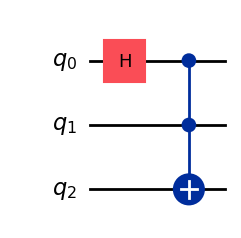

In [ ]:
# Designing the quantum circuit with Qiskit
qc1 = QuantumCircuit(3)

# hadamard gate for first qubit
qc1.h(0)

# Toffoli gate for the target qubit q2
qc1.ccx(0, 1, 2)

display((qc1.draw('mpl')))


### Measuring the Toffoli Gate Circuit

In [ ]:
# final statevector of the circuit
state = Statevector.from_instruction(qc1)
display(state.draw('latex'))

<IPython.core.display.Latex object>

In [ ]:
def measure_statevector(state):
    # probabilities of each computational basis state
    probabilities = np.abs(state) ** 2
    num_qubits = int(np.log2(len(state)))  # Number of qubits from length of statevector
    print(f"Probabilities: {probabilities}")

    # Randomly choose a state based on probabilities
    outcome = np.random.choice(len(probabilities), p=probabilities)

    # Convert outcome to a binary string representing the measured state (with num_qubits bits)
    measured_state = format(outcome, f'0{num_qubits}b')
    return measured_state

# Measure the statevector
measurement_result = measure_statevector(state.data)
print("Measurement result:", measurement_result)

Probabilities: [0.  0.  0.  0.5 0.  0.  0.5 0. ]
Measurement result: 110


- The Fredkin gate, also known as the Controlled-SWAP (CSWAP) gate, is a reversible, three-qubit gate. Here’s a breakdown of its key features:

- It swaps the states of two target qubits if the control qubit is in the |1⟩ state. If the control qubit is |0⟩, the target qubits remain unchanged.


- The gate takes three qubits: one control qubit and two target qubits.

- The output depends on the control qubit:

- If the control qubit is |0⟩, the target qubits pass through unchanged.

- If the control qubit is |1⟩, the states of the two target qubits are swapped.

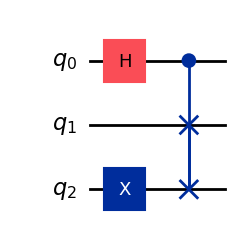

In [ ]:
# Quantum Circuit 2 (Fredkin Operation)
qc2 = QuantumCircuit(3)

# Hadamard gate on q0
qc2.h(0)
# X gate on q2
qc2.x(2)
# Fredkin gate: control on q0, swap between q1 and q2
qc2.cswap(0, 1, 2)

qc2.draw('mpl')



In [ ]:
# final statevector of the circuit
state1 = Statevector.from_instruction(qc2)
display(state.draw('latex'))

<IPython.core.display.Latex object>

In [ ]:
# Function to measure the statevector using numpy
def measure_statevector(state):
    # probabilities of each computational basis state
    probabilities = np.abs(state) ** 2
    num_qubits = int(np.log2(len(state)))  # Number of qubits from length of statevector
    print(f"Probabilities: {probabilities}")

    # Randomly choose a state based on probabilities
    outcome = np.random.choice(len(probabilities), p=probabilities)

    # Convert outcome to a binary string representing the measured state (with num_qubits bits)
    measured_state = format(outcome, f'0{num_qubits}b')
    return measured_state

# Measure the statevector
measurement_result = measure_statevector(state1.data)
print("Measurement result:", measurement_result)

Probabilities: [0.  0.  0.  0.5 0.5 0.  0.  0. ]
Measurement result: 011


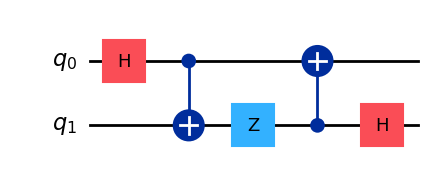

In [ ]:
# Quantum Circuit 3

circuit = QuantumCircuit(2)

# hadamard
circuit.h(0)
# CNOT operation control bit is qo and target is q1
circuit.cx(0,1)
# Z operation on 2nd qubit
circuit.z(1)
# CNOT operation control bit as q1 and target is q0
circuit.cx(1,0)
# hadamard operation on the 2nd qubit
circuit.h(1)

display(circuit.draw('mpl'))

## Explanation of the Operators


### 1. **Pauli-Z Gate** (Phase-Flip Gate)

The Pauli-Z gate performs a phase flip on the $ |1\rangle $ state, leaving $ |0\rangle $ unchanged. It is represented as:

$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$

This gate is used to change the relative phase between $ |0\rangle $ and $ |1\rangle $, which is crucial for interference effects in quantum algorithms.

### 2. **Hadamard Gate (H)**

The Hadamard gate creates a superposition of the computational basis states $ |0\rangle $ and $ |1\rangle $. It transforms the qubit into an equal superposition, and is mathematically given by:

$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$




In [ ]:
# Answer for Part B of the question

# quantum gates as matrices
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate
S = np.array([[1, 0], [0, 1j]])  # Phase gate (S)
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])  # T-gate

# example initial state |ψ⟩
psi = np.array([[1], [0]])  # |0⟩ state

# T then H
state_TH = np.dot(H, np.dot(T, psi))

# H then T
state_HT = np.dot(T, np.dot(H, psi))

print("State after applying T then H:")
print(state_TH)

print("State after applying H then T:")
print(state_HT)

print("Are the states equal? ", np.allclose(state_TH, state_HT))


State after applying T then H:
[[0.70710678+0.j]
 [0.70710678+0.j]]
State after applying H then T:
[[0.70710678+0.j ]
 [0.5       +0.5j]]
Are the states equal?  False
